# Welcome to the Python for Data Scientist: An Introduction!

For this module, we will use Natural Language ToolKit along with several other popular Python packages to build a data science pipeline to plot frequency histograms of words in html novels.

To get started, you will need a Python installation (3.6.3 or later is recommended).
```
$ python --version
3.6.3
```


Clone or download the repository https://github.com/LSU-Analytics/activate_2018.git
```
$ git clone https://github.com/LSU-Analytics/activate_2018.git
```

Run this command to install the packages: 
```
$ pip install -r requirements.txt
```

Or you can install the packages individually.
```
$ pip install beautifulsoup4
$ pip install jupyter
$ pip install matplotlib
$ pip install nltk
$ pip install pandas
$ pip install requests
$ pip install scipy
$ pip install seaborn
```

## Get some data
Where do we get data?  That's easy...data is everywhere.  We can import files (csv, xlsx, txt), pull from APIs (usually as JSON), or obtain raw HTML.  For this example, we will use the freely available online at Project Gutenberg.

Here are several links to well known HTML books:
- 'https://www.gutenberg.org/files/514/514-h/514-h.htm' # Little Women
- 'https://www.gutenberg.org/files/42671/42671-h/42671-h.htm' # Pride & Prejudice
- 'https://www.gutenberg.org/files/203/203-h/203-h.htm' # Uncle Tom's Cabin
- 'https://www.gutenberg.org/files/205/205-h/205-h.htm' # Walden
- 'http://www.bramstoker.org/txt/novels/05dracula.txt' # Dracula
- 'https://www.gutenberg.org/files/1184/1184-h/1184-h.htm' # Count of Monte Cristo

In [1]:
# Store url
#url = 'https://www.gutenberg.org/files/514/514-h/514-h.htm' # Little Women
url = 'https://www.gutenberg.org/files/42671/42671-h/42671-h.htm' # Pride & Prejudice
#url = 'https://www.gutenberg.org/files/203/203-h/203-h.htm' # Uncle Tom's Cabin
#url = 'https://www.gutenberg.org/files/205/205-h/205-h.htm' # Walden

Next, we need to fetch the HTML file.  To do this, we will use a popular package known as ```requests```.  If you are familiar with http requests, we will be submitting a ```GET``` request.

In [2]:
# Import `requests`
import requests

# Make the request and check object type
r = requests.get(url)
type(r)

requests.models.Response

The ```type``` command outputs the datatype.  Here we are getting a ```Response`` object.

The following commands extract and outputs the raw HTML.

In [3]:
# Extract HTML from Response object and print
html = r.text
print(html)

<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
    "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd">
<html xmlns="http://www.w3.org/1999/xhtml">
<head>
<meta http-equiv="Content-Type" content="text/html; charset=ISO-8859-1" />
<title>The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen</title>
    <style type="text/css">

body {
    margin-left: 10%;
    margin-right: 10%;
}

    h1,h2,h3,h4,h5,h6 {
    text-align: center; /* all headings centered */
    clear: both;
}

p {
    margin-top: .75em;
    text-align: justify;
    margin-bottom: .75em;
}

hr {
    width: 33%;
    margin-top: 2em;
    margin-bottom: 2em;
    margin-left: auto;
    margin-right: auto;
    clear: both;
}

table {
    margin-left: auto;
    margin-right: auto;
}

.pagenum { /* uncomment the next line for invisible page numbers */
    /*  visibility: hidden;  */
    position: absolute;
    left: 92%;
    font-size: smaller;
    text-align: right;
} /* page numbers */

.linenum {
    pos

## Wrangle the data

**Tag soup** refers to unstructured (or malformed) HTML code.  The package ```BeautifulSoup``` allows you to easily interact with this code.

Because we are in Lousiana, let's refer to our HTML soup as 'gumbo'.

In [4]:
# Import BeautifulSoup from bs4
from bs4 import BeautifulSoup

# Create a BeautifulSoup object from the HTML
gumbo = BeautifulSoup(html, "html5lib")
type(gumbo)

bs4.BeautifulSoup

From our ```gumbo``` object, we can extract some information such as title.

In [5]:
# Get title as string
gumbo.title.string

'The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen'

We can also find the hyperlinks within a page (< a > tags):

In [6]:
# Get hyperlinks from gumbo and check out first several
gumbo.findAll('a')[:8]

[<a href="http://www.gutenberg.org">www.gutenberg.org</a>,
 <a href="http://www.pgdp.net">http://www.pgdp.net</a>,
 <a href="http://archive.org">http://archive.org</a>,
 <a href="http://archive.org/stream/novelstextbasedo02austuoft#page/n23/mode/2up">
       http://archive.org/stream/novelstextbasedo02austuoft#page/n23/mode/2up</a>,
 <a href="images/illus1big.jpg"><img alt="" src="images/illus1.jpg"/></a>,
 <a href="images/illus2big.jpg"><img alt="" src="images/illus2.jpg"/></a>,
 <a href="images/illus3big.jpg"><img alt="" src="images/illus3.jpg"/></a>,
 <a href="images/illus4big.jpg"><img alt="" src="images/illus4.jpg"/></a>]

    For this project, we want the text from the ```gumbo``` object.  Luckily, there is a ```.get_text()``` method for doing this.

In [7]:
# Get the text out of the gumbo and print it
text = gumbo.get_text()
print(text)



The Project Gutenberg eBook of Pride and Prejudice, by Jane Austen
    

body {
    margin-left: 10%;
    margin-right: 10%;
}

    h1,h2,h3,h4,h5,h6 {
    text-align: center; /* all headings centered */
    clear: both;
}

p {
    margin-top: .75em;
    text-align: justify;
    margin-bottom: .75em;
}

hr {
    width: 33%;
    margin-top: 2em;
    margin-bottom: 2em;
    margin-left: auto;
    margin-right: auto;
    clear: both;
}

table {
    margin-left: auto;
    margin-right: auto;
}

.pagenum { /* uncomment the next line for invisible page numbers */
    /*  visibility: hidden;  */
    position: absolute;
    left: 92%;
    font-size: smaller;
    text-align: right;
} /* page numbers */

.linenum {
    position: absolute;
    top: auto;
    left: 4%;
} /* poetry number */

.blockquot {
    margin-left: 5%;
    margin-right: 10%;
}

.sidenote {
    width: 20%;
    padding-bottom: .5em;
    padding-top: .5em;
    padding-left: .5em;
    padding-right: .5em;
    margin-left: 1em;

Almost there!  While we have the text of the novel, it still contains some metadata.  Since the metadata is minimal and will not influence our findings, let's move forward witht he project.

## Extract Words
Next, we will use ```nltk``` tokenize text and remove stopwords.

Regex in use.

In [8]:
# Import regex package
import re

# Define sentence
sentence = 'peter piper pick a peck of pickled peppers'

# Define regex
ps = 'p\w+'


# Find all words in sentence that match the regex and print them
re.findall(ps, sentence)

['peter', 'piper', 'pick', 'peck', 'pickled', 'peppers']

In [9]:
# Find all words and print them
re.findall('\w+', sentence)

['peter', 'piper', 'pick', 'a', 'peck', 'of', 'pickled', 'peppers']

Let's do something similar with the ```text``` object.

In [10]:
# Find all words in Moby Dick and print several
tokens = re.findall('\w+', text)
tokens[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Pride', 'and', 'Prejudice']

**Note** that there is also a way to do this with ```nltk```, the Natural Language Toolkit:

In [11]:
# Import RegexpTokenizer from nltk.tokenize
from nltk.tokenize import RegexpTokenizer

# Create tokenizer
tokenizer = RegexpTokenizer('\w+')


# Create tokens
tokens = tokenizer.tokenize(text)
tokens[:8]

['The', 'Project', 'Gutenberg', 'eBook', 'of', 'Pride', 'and', 'Prejudice']

Almost there!  At this point, words that start with a capital letter will be counted a separate instance.  To handle this issue, make all of the words lowercase.

In [12]:
# Initialize new list
words = []


# Loop through list tokens and make lower case
for word in tokens:
    words.append(word.lower())


# Print several items from list as sanity check
words[:8]

['the', 'project', 'gutenberg', 'ebook', 'of', 'pride', 'and', 'prejudice']

Stop words provide no real insights so let's remove them. 

In [13]:
# Import nltk
import nltk

# Get English stopwords and print some of them
sw = nltk.corpus.stopwords.words('english')
sw[:5]

# If you encounter an error, run the command below.
# nltk.download('stopwords')

['i', 'me', 'my', 'myself', 'we']

In [14]:
# Initialize new list
words_ns = []

# Add to words_ns all words that are in words but not in sw
for word in words:
    if word not in sw:
        words_ns.append(word)

# Print several list items as sanity check
words_ns[:5]


['project', 'gutenberg', 'ebook', 'pride', 'prejudice']

## Answering the question
We started this project wanting to know the most frequently used words in a novel.  An easy manner to answer this question is to create a graph.

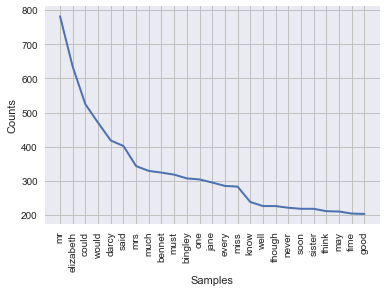

In [15]:
#Import datavis libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization style
%matplotlib inline
sns.set()

# Create freq dist and plot
freqdist1 = nltk.FreqDist(words_ns)
freqdist1.plot(25)

## Bonus: Create a reusable function

There are hundreds of novels on Project Gutenbergso it makes sense to write a function that does utilizes our code from above.

In [16]:
def plot_word_freq(url, num = 25):
    """Takes a url & frequency and plots the word distribution"""
    # Make the request and check object type
    r = requests.get(url)
    # Extract HTML from Response object and print
    html = r.text
    # Create a BeautifulSoup object from the HTML
    gumbo = BeautifulSoup(html, "html5lib")
    # Get the text out of the soup and print it
    text = gumbo.get_text()
    # Create tokenizer
    tokenizer = RegexpTokenizer('\w+')
    # Create tokens
    tokens = tokenizer.tokenize(text)
    # Initialize new list
    words = []
    # Loop through list tokens and make lower case
    for word in tokens:
        words.append(word.lower())
    # Get English stopwords and print some of them
    sw = nltk.corpus.stopwords.words('english')
    # Initialize new list
    words_ns = []
    # Add to words_ns all words that are in words but not in sw
    for word in words:
        if word not in sw:
            words_ns.append(word)
    # Create freq dist and plot
    freqdist1 = nltk.FreqDist(words_ns)
    freqdist1.plot(num)

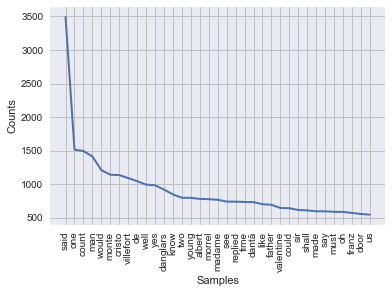

In [21]:
plot_word_freq('https://www.gutenberg.org/files/1184/1184-h/1184-h.htm', 35)

## Conclusion

What have we learned?  You now have the foundation for 'scraping' HTML data from a website, extracting data, manipulating text, and plotting output.